In [2]:
#Import libraries
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load dataset 
df=pd.read_csv('Customer_Segmentation.csv')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
def missing_value_percentages(df):
    missing_percent = df.isnull().mean() * 100
    missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)
    
    print("Missing Value Percentage per Feature:\n")
    print(missing_summary.round(2).astype(str) + " %")
    
    return missing_summary

missing_summary=missing_value_percentages(df)
missing_summary

Missing Value Percentage per Feature:

Income    1.07 %
dtype: object


Income    1.071429
dtype: float64

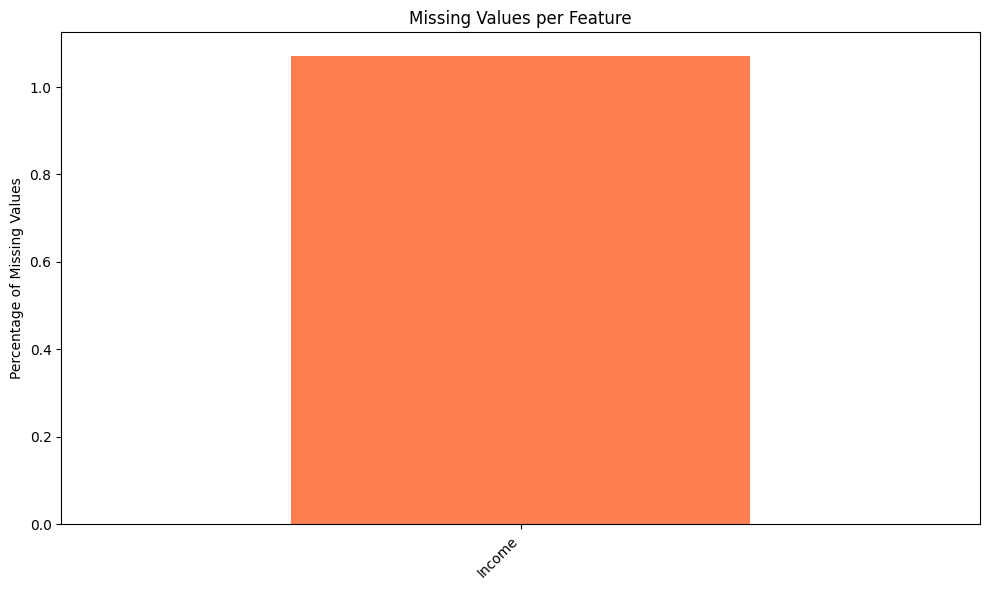

In [7]:
def plot_missing_percentages(df):
    missing_percent = df.isnull().mean() * 100
    missing = missing_percent[missing_percent > 0].sort_values(ascending=False)

    if missing.empty:
        print("No missing values to visualize.")
        return

    plt.figure(figsize=(10, 6))
    missing.plot(kind='bar', color='coral')
    plt.ylabel("Percentage of Missing Values")
    plt.title("Missing Values per Feature")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_missing_percentages(df)


In [8]:
columns=['Income']

for col in columns:
    df[col].fillna(df[col].median(),inplace=True)

/tmp/ipykernel_4050/4218436287.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
df.to_csv('Customer_Segmentation_cleaned.csv')

In [12]:
#Working with wrong formats and data types
df2=pd.read_csv('Customer_Segmentation_cleaned.csv')


In [13]:
# Function to plot a histogram for a specified column in a DataFrame
def plot_histogram(df, column_name, bins="auto", title=None, xlabel=None, ylabel="Frequency", figsize=(10, 6)):
    """
    Plots a histogram for a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to plot.
        bins (int or str): Number of bins for the histogram, or "auto" for automatic binning.
                           Defaults to "auto".
        title (str, optional): Title of the plot. Defaults to "Histogram of [column_name]".
        xlabel (str, optional): Label for the x-axis. Defaults to column_name.
        ylabel (str, optional): Label for the y-axis. Defaults to "Frequency".
        figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (10, 6).
        save_path (str, optional): Path to save the plot (e.g., "histogram_income.png").
                                   If None, the plot is displayed.
    """
    if column_name not in df.columns:
        print(f"Error: Column \'{column_name}\' not found in the DataFrame.")
        return

    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=column_name, bins=bins, kde=True) # kde=True adds a density curve

    # Set titles and labels
    if title is None:
        plt.title(f"Histogram of {column_name}")
    else:
        plt.title(title)

    if xlabel is None:
        plt.xlabel(column_name)
    else:
        plt.xlabel(xlabel)

    plt.ylabel(ylabel)

    
    plt.show()





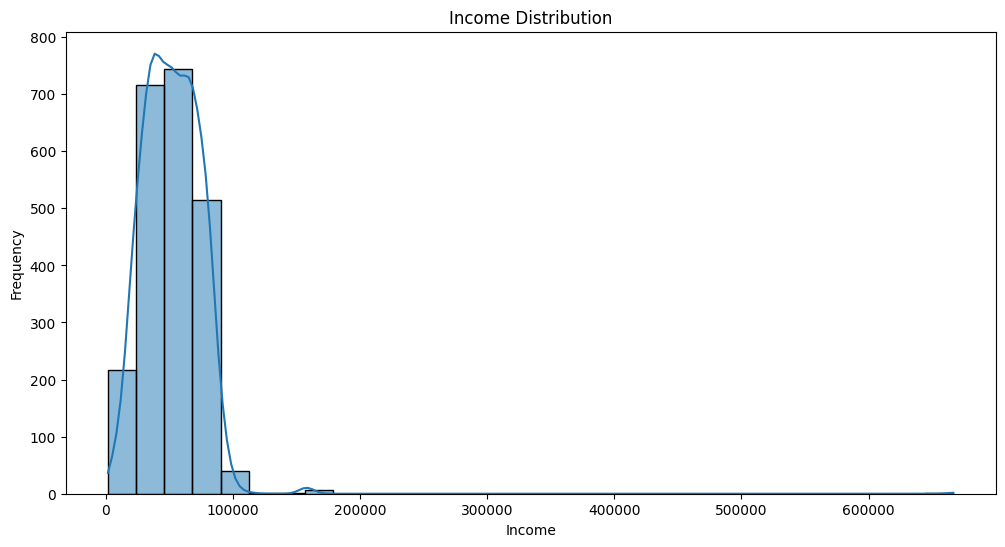

In [14]:
plot_histogram(df2, 'Income', bins=30, title='Income Distribution', xlabel='Income', ylabel='Frequency', figsize=(12, 6))

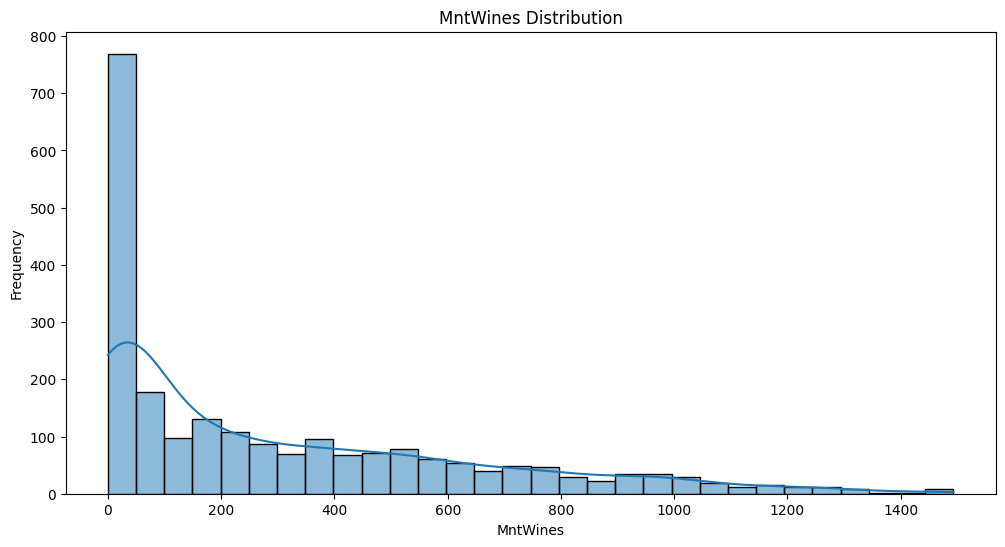

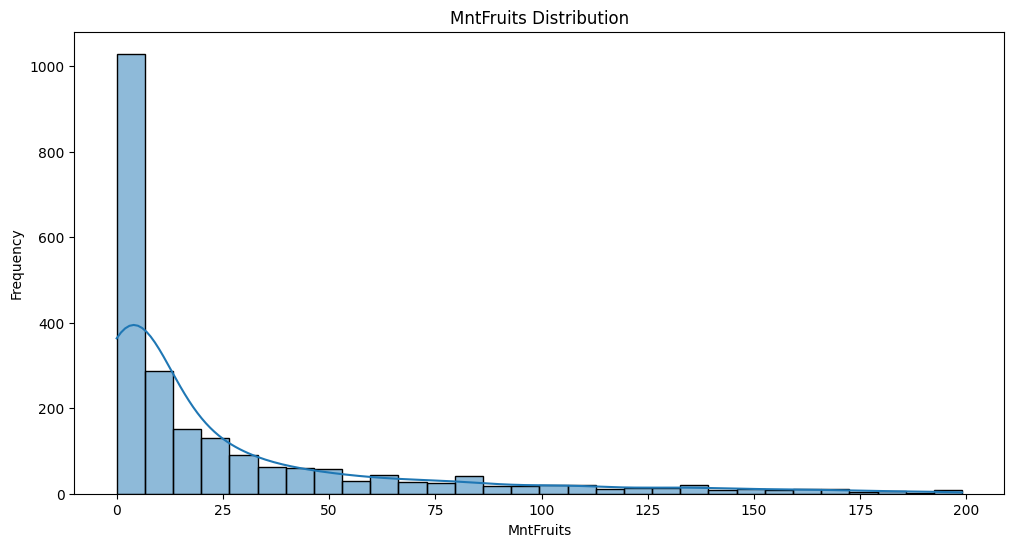

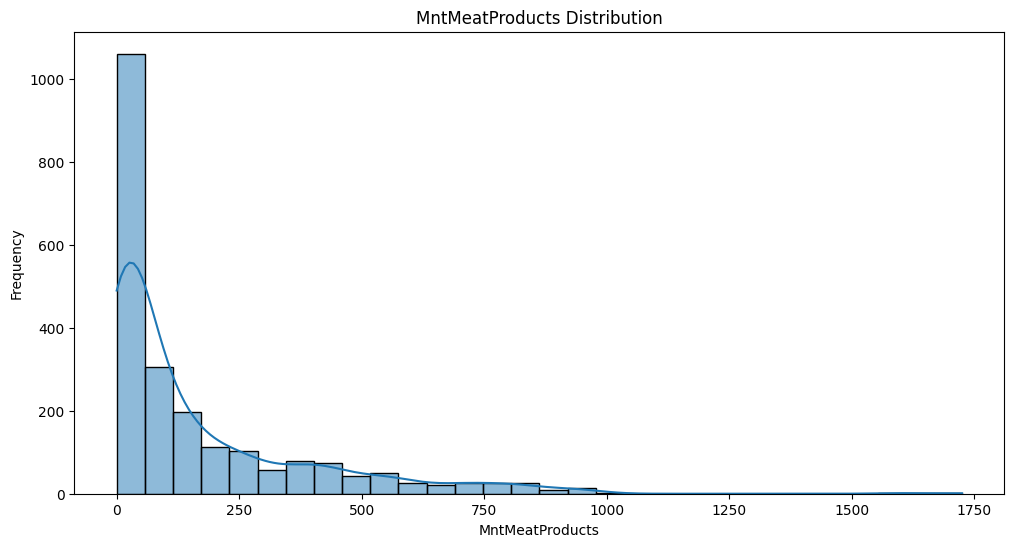

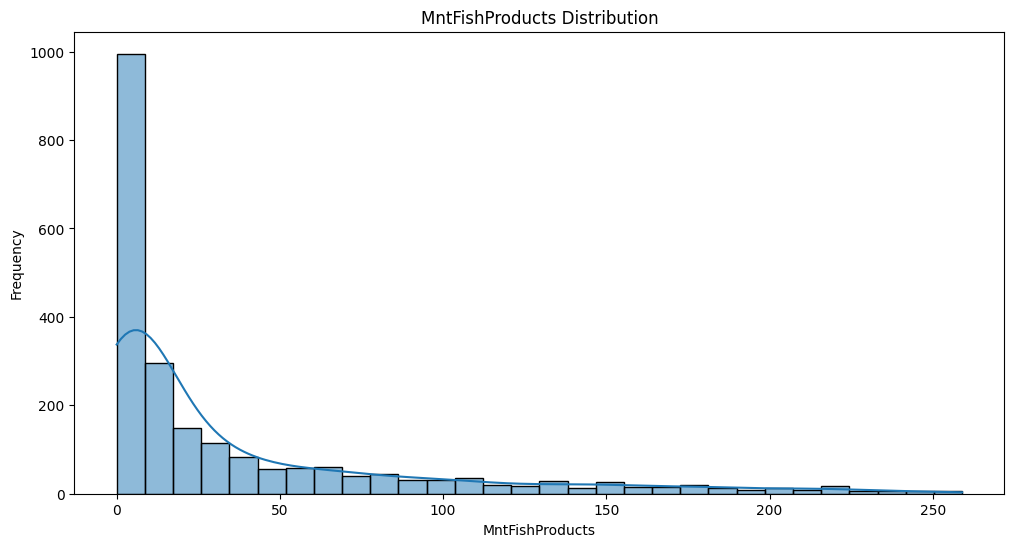

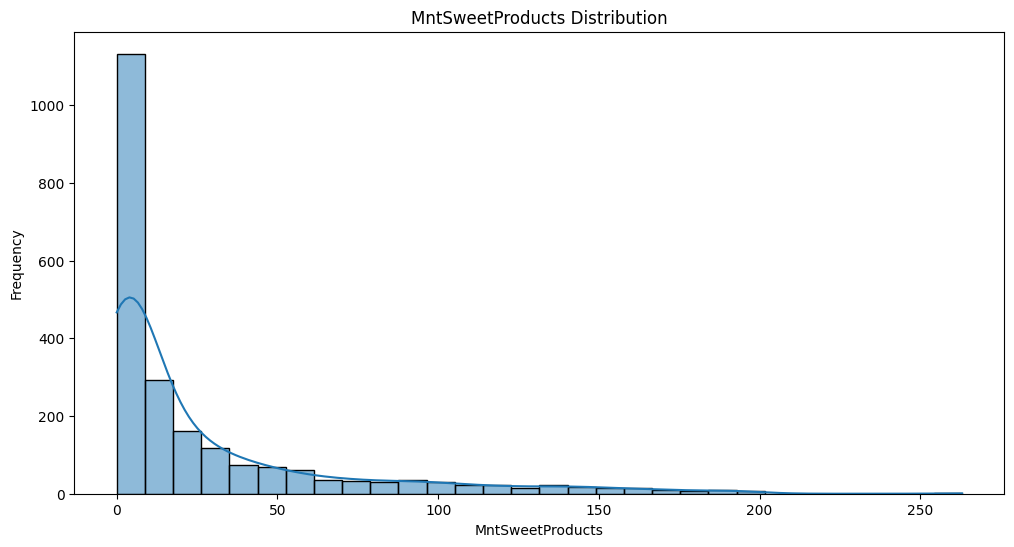

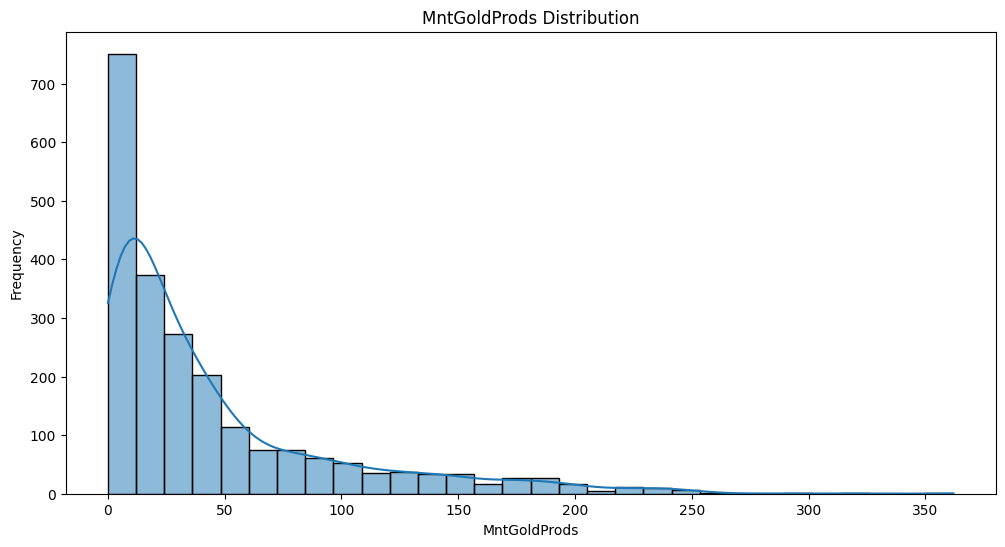

In [15]:
spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

for col in spending_cols:
    plot_histogram(df2, col, bins=30, title=f'{col} Distribution', xlabel=col, ylabel='Frequency', figsize=(12, 6))

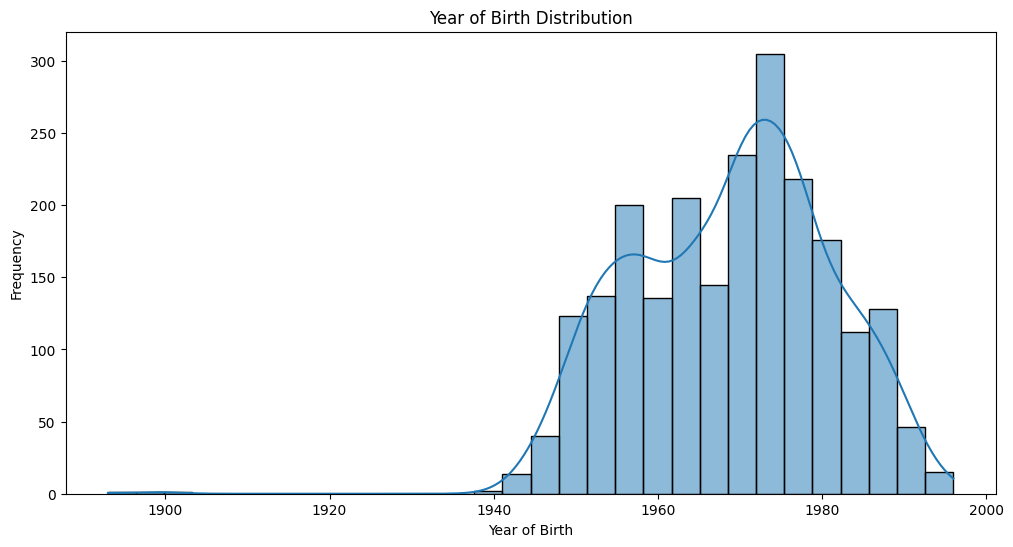

In [16]:
plot_histogram(df2,column_name='Year_Birth', bins=30, title='Year of Birth Distribution', xlabel='Year of Birth', ylabel='Frequency', figsize=(12, 6))

In [17]:


def detect_outliers_iqr(df, column):
    # Step 1: Calculate IQR boundaries
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 2: Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Step 3: Print results
    print(f"Outlier Detection for: {column}")
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    print(f"\nNumber of outliers: {len(outliers)}")
    print("Outlier Records (First 5):")
    print(outliers[['ID', column]].head())  # You can remove 'ID' if not in your df

    # Step 4: Visualize with a boxplot
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df[column], color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound = {int(lower_bound)}')
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound = {int(upper_bound)}')
    plt.title(f"Boxplot of {column} with Outlier Thresholds")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return outliers



Analyzing column: Unnamed: 0
Outlier Detection for: Unnamed: 0
Lower Bound: -1119.5
Upper Bound: 3358.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Unnamed: 0]
Index: []


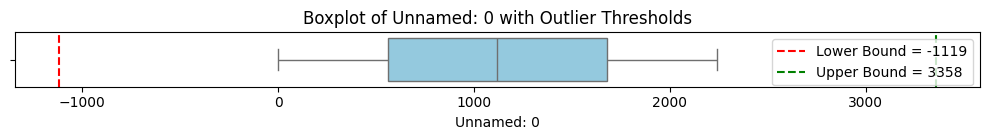


Analyzing column: ID
Outlier Detection for: ID
Lower Bound: -5571.0
Upper Bound: 16827.0

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, ID]
Index: []


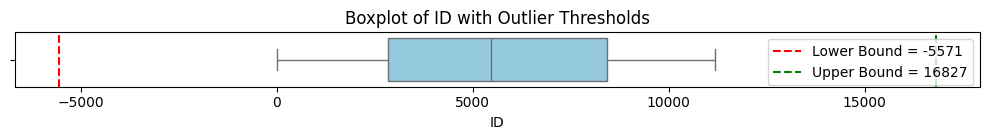


Analyzing column: Year_Birth
Outlier Detection for: Year_Birth
Lower Bound: 1932.0
Upper Bound: 2004.0

Number of outliers: 3
Outlier Records (First 5):
        ID  Year_Birth
192   7829        1900
239  11004        1893
339   1150        1899


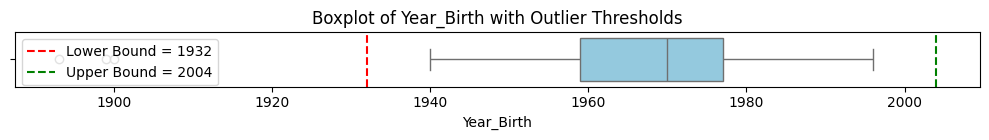


Analyzing column: Income
Outlier Detection for: Income
Lower Bound: -13587.75
Upper Bound: 117416.25

Number of outliers: 8
Outlier Records (First 5):
        ID    Income
164   8475  157243.0
617   1503  162397.0
655   5555  153924.0
687   1501  160803.0
1300  5336  157733.0


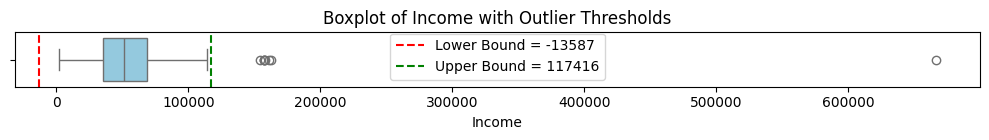


Analyzing column: Kidhome
Outlier Detection for: Kidhome
Lower Bound: -1.5
Upper Bound: 2.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Kidhome]
Index: []


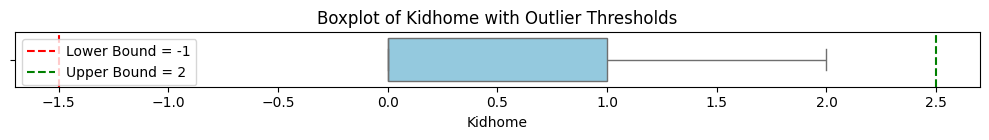


Analyzing column: Teenhome
Outlier Detection for: Teenhome
Lower Bound: -1.5
Upper Bound: 2.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Teenhome]
Index: []


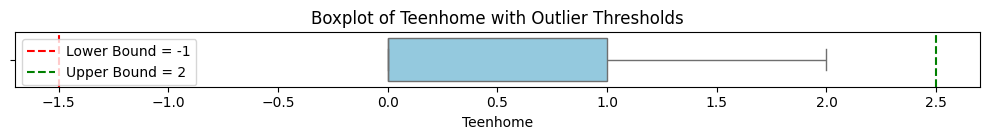


Analyzing column: Recency
Outlier Detection for: Recency
Lower Bound: -51.0
Upper Bound: 149.0

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, Recency]
Index: []


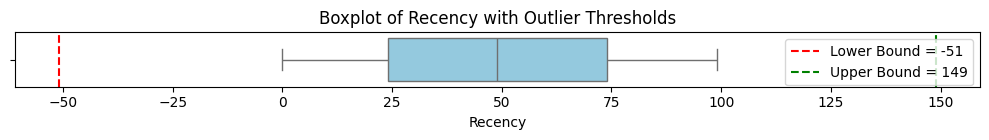


Analyzing column: MntWines
Outlier Detection for: MntWines
Lower Bound: -697.0
Upper Bound: 1225.0

Number of outliers: 35
Outlier Records (First 5):
       ID  MntWines
111  7431      1332
161  9260      1349
295  2926      1241
424  6932      1285
430  3725      1248


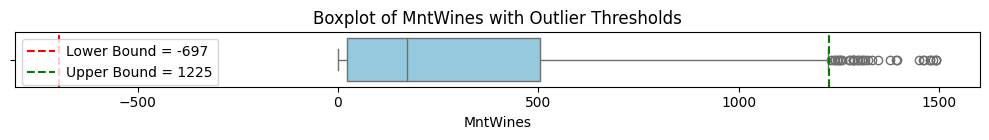


Analyzing column: MntFruits
Outlier Detection for: MntFruits
Lower Bound: -47.0
Upper Bound: 81.0

Number of outliers: 227
Outlier Records (First 5):
      ID  MntFruits
0   5524         88
29  1966        100
45  1371        164
53  2225        120
72  6312        107


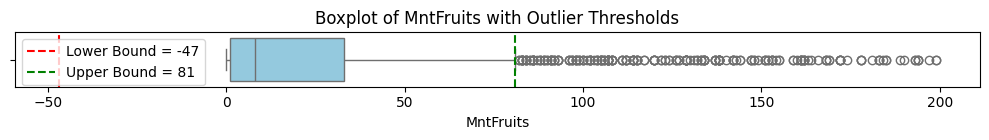


Analyzing column: MntMeatProducts
Outlier Detection for: MntMeatProducts
Lower Bound: -308.0
Upper Bound: 556.0

Number of outliers: 175
Outlier Records (First 5):
      ID  MntMeatProducts
21  5376             1725
29  1966              801
51  4114              780
76  1859              925
77  7503              779


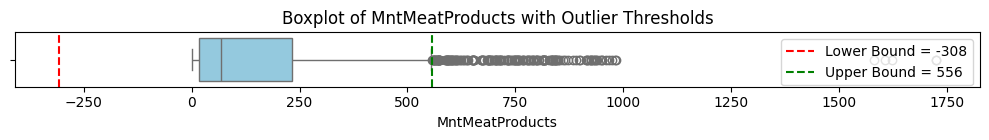


Analyzing column: MntFishProducts
Outlier Detection for: MntFishProducts
Lower Bound: -67.5
Upper Bound: 120.5

Number of outliers: 223
Outlier Records (First 5):
      ID  MntFishProducts
0   5524              172
12  2125              225
17  4939              150
39  2968              160
45  1371              227


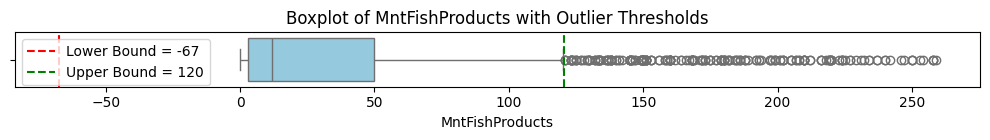


Analyzing column: MntSweetProducts
Outlier Detection for: MntSweetProducts
Lower Bound: -47.0
Upper Bound: 81.0

Number of outliers: 248
Outlier Records (First 5):
      ID  MntSweetProducts
0   5524                88
12  2125               112
27  5255               263
40  8601               178
51  4114               167


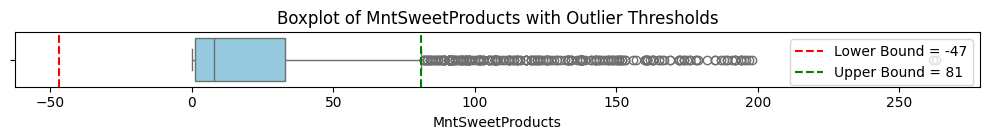


Analyzing column: MntGoldProds
Outlier Detection for: MntGoldProds
Lower Bound: -61.5
Upper Bound: 126.5

Number of outliers: 207
Outlier Records (First 5):
      ID  MntGoldProds
18  6565           176
27  5255           362
45  1371           174
53  2225           241
55  6260           190


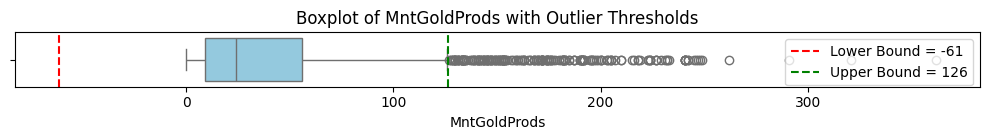


Analyzing column: NumDealsPurchases
Outlier Detection for: NumDealsPurchases
Lower Bound: -2.0
Upper Bound: 6.0

Number of outliers: 86
Outlier Records (First 5):
      ID  NumDealsPurchases
21  5376                 15
24  1409                  7
49  6566                  9
54  9381                  7
69  1357                  7


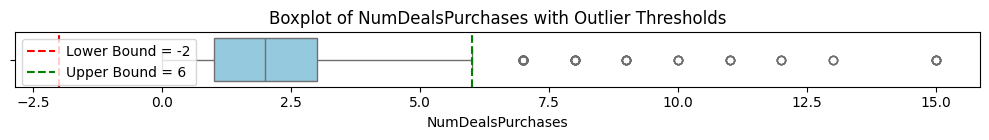


Analyzing column: NumWebPurchases
Outlier Detection for: NumWebPurchases
Lower Bound: -4.0
Upper Bound: 12.0

Number of outliers: 4
Outlier Records (First 5):
         ID  NumWebPurchases
27     5255               27
1806   6237               23
1898   4619               27
1975  10311               25


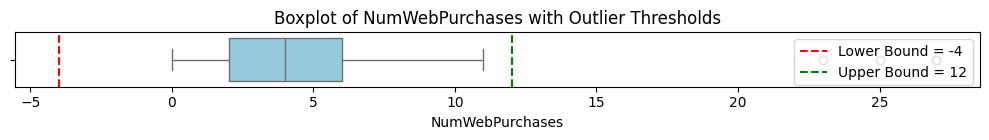


Analyzing column: NumCatalogPurchases
Outlier Detection for: NumCatalogPurchases
Lower Bound: -6.0
Upper Bound: 10.0

Number of outliers: 23
Outlier Records (First 5):
        ID  NumCatalogPurchases
21    5376                   28
104   8908                   11
164   8475                   22
288  10102                   11
586   9058                   11


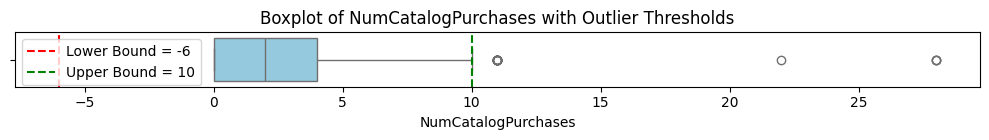


Analyzing column: NumStorePurchases
Outlier Detection for: NumStorePurchases
Lower Bound: -4.5
Upper Bound: 15.5

Number of outliers: 0
Outlier Records (First 5):
Empty DataFrame
Columns: [ID, NumStorePurchases]
Index: []


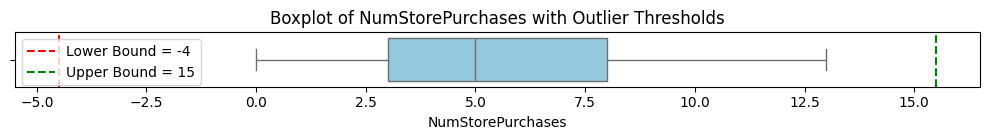


Analyzing column: NumWebVisitsMonth
Outlier Detection for: NumWebVisitsMonth
Lower Bound: -3.0
Upper Bound: 13.0

Number of outliers: 8
Outlier Records (First 5):
         ID  NumWebVisitsMonth
9      5899                 20
774    4303                 20
981    3955                 14
1042  10749                 19
1245   6862                 20


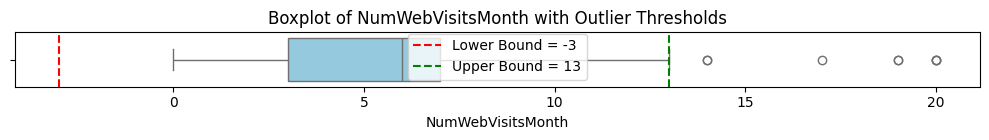

Skipping column 'AcceptedCmp3' (only 2 unique value(s))
Skipping column 'AcceptedCmp4' (only 2 unique value(s))
Skipping column 'AcceptedCmp5' (only 2 unique value(s))
Skipping column 'AcceptedCmp1' (only 2 unique value(s))
Skipping column 'AcceptedCmp2' (only 2 unique value(s))
Skipping column 'Complain' (only 2 unique value(s))
Skipping column 'Z_CostContact' (only 1 unique value(s))
Skipping column 'Z_Revenue' (only 1 unique value(s))
Skipping column 'Response' (only 2 unique value(s))


In [18]:
for col in df2.select_dtypes(include='number').columns:
    unique_vals = df2[col].nunique()
    
    if unique_vals <= 2:
        print(f"Skipping column '{col}' (only {unique_vals} unique value(s))")
        continue
    
    print(f"\nAnalyzing column: {col}")
    detect_outliers_iqr(df2, col)


In [19]:
#Removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter: keep only rows within bounds
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

    print(f"Removed {df.shape[0] - cleaned_df.shape[0]} outliers from column '{column}'")
    return cleaned_df


In [20]:
df1_cleaned=remove_outliers_iqr(df2,column='Year_Birth')
df2_cleaned=remove_outliers_iqr(df2,column='Income')

df2_cleaned.to_csv('cleaned_dataset.csv')



Removed 3 outliers from column 'Year_Birth'
Removed 8 outliers from column 'Income'


In [21]:
#FEATURE ENGINEERING

from datetime import datetime

df3=pd.read_csv('cleaned_dataset.csv')

# 1. Create Age
# Assuming the current year is 2025 for consistency with previous responses
CURRENT_YEAR = 2025
df3['Age'] = CURRENT_YEAR - df3['Year_Birth']

# 2. Create Customer_Tenure
# Convert 'Dt_Customer' to datetime objects
df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], format='%d-%m-%Y')


most_recent_date = df3['Dt_Customer'].max()

# Calculate tenure in days
df3['Customer_Tenure'] = (most_recent_date - df3['Dt_Customer']).dt.days

# Create Total_Spending
spending_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]
df3['Total_Spending'] = df3[spending_cols].sum(axis=1)

# 4. Create Total_Purchases
purchase_cols = [
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]
df3['Total_Purchases'] = df3[purchase_cols].sum(axis=1)

df3['Total_Children'] = df3['Kidhome'] + df3['Teenhome']


print(df3.head(5))


   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth   Education Marital_Status  \
0             0           0  5524        1957  Graduation         Single   
1             1           1  2174        1954  Graduation         Single   
2             2           2  4141        1965  Graduation       Together   
3             3           3  6182        1984  Graduation       Together   
4             4           4  5324        1981         PhD        Married   

    Income  Kidhome  Teenhome Dt_Customer  ...  AcceptedCmp2  Complain  \
0  58138.0        0         0  2012-09-04  ...             0         0   
1  46344.0        1         1  2014-03-08  ...             0         0   
2  71613.0        0         0  2013-08-21  ...             0         0   
3  26646.0        1         0  2014-02-10  ...             0         0   
4  58293.0        1         0  2014-01-19  ...             0         0   

   Z_CostContact  Z_Revenue  Response  Age  Customer_Tenure  Total_Spending  \
0              3   

In [22]:

# Define the mapping for simplification
marital_status_simplification = {
    'Married': 'In a Relationship',
    'Together': 'In a Relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

# Apply the mapping to the 'Marital_Status' column and create a new column 'Marital_Status_Simplified'
df3['Marital_Status_Simplified'] = df3['Marital_Status'].replace(marital_status_simplification)

# Display the first few rows with the new column to verify
print(df3[['Marital_Status', 'Marital_Status_Simplified']].head())

# Print the value counts of the new simplified column for your entire df3
print('\nValue counts of the new simplified column:')
print(df3['Marital_Status_Simplified'].value_counts())


  Marital_Status Marital_Status_Simplified
0         Single                    Single
1         Single                    Single
2       Together         In a Relationship
3       Together         In a Relationship
4        Married         In a Relationship

Value counts of the new simplified column:
Marital_Status_Simplified
In a Relationship    1437
Single                795
Name: count, dtype: int64



--- K-Means on df2 (Original Features) ---
Shape of scaled_df2: (2240, 26)
Columns used for clustering:
 ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']


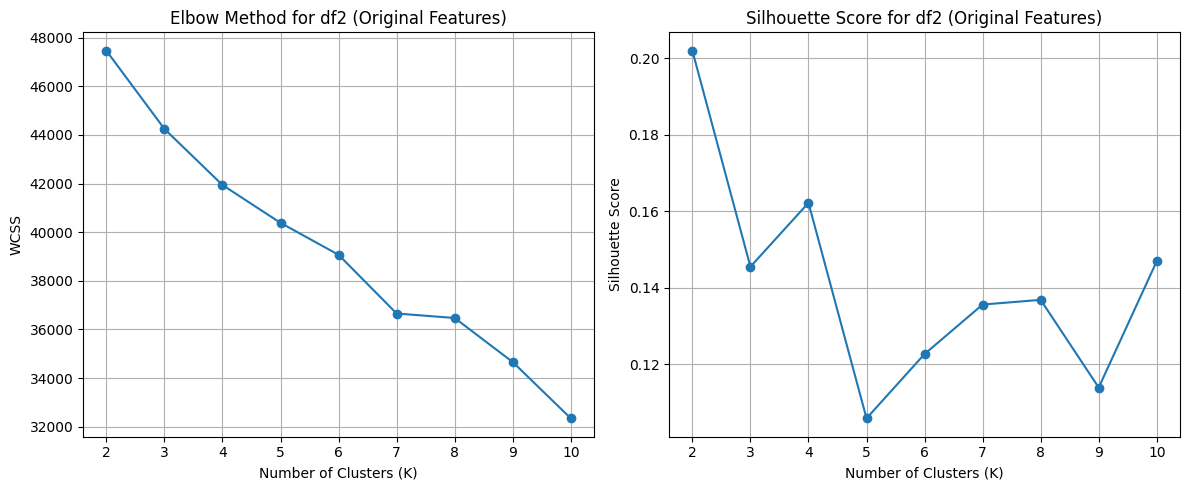


--- Evaluation for df2 (Original Features) ---
Chosen Optimal K: 3
Inertia (WCSS): 44245.91
Silhouette Score: 0.15

DataFrame df2 head with original clusters:
      ID   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524  58138.0        0         0       58       635         88   
1  2174  46344.0        1         1       38        11          1   
2  4141  71613.0        0         0       26       426         49   
3  6182  26646.0        1         0       26        11          4   
4  5324  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15  

In [23]:
#Developing a model on the original dataset without the new column
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# 1. Select features for clustering from df2
#    Using all relevant original numerical and categorical columns
original_numerical_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]
original_categorical_cols = [
    'Education', 'Marital_Status' # Using the original, unsimplified columns
]

# Combine selected features into a temporary DataFrame for processing
df2_clustering_features = df2[original_numerical_cols + original_categorical_cols].copy()

# 2. One-Hot Encode the original categorical features
df2_encoded = pd.get_dummies(df2_clustering_features, columns=original_categorical_cols, drop_first=True)

# 3. Scale all features
scaler_df2 = StandardScaler()
scaled_df2_features = scaler_df2.fit_transform(df2_encoded)
scaled_df2 = pd.DataFrame(scaled_df2_features, columns=df2_encoded.columns, index=df2_encoded.index)

print("\n--- K-Means on df2 (Original Features) ---")
print("Shape of scaled_df2:", scaled_df2.shape)
print("Columns used for clustering:\n", scaled_df2.columns.tolist())

# 4. Determine Optimal K for df2 (Elbow Method & Silhouette Score)
wcss_df2 = []
silhouette_scores_df2 = []

# Test K from 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df2)
    wcss_df2.append(kmeans.inertia_)
    score = silhouette_score(scaled_df2, kmeans.labels_)
    silhouette_scores_df2.append(score)

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss_df2, marker='o')
plt.title('Elbow Method for df2 (Original Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_df2, marker='o')
plt.title('Silhouette Score for df2 (Original Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Apply K-Means with chosen K

optimal_k_df2 = 3
kmeans_df2 = KMeans(n_clusters=optimal_k_df2, init='k-means++', random_state=42, n_init=10)
cluster_labels_df2 = kmeans_df2.fit_predict(scaled_df2)

# Add cluster labels to the original df2
df2['Cluster_Original'] = cluster_labels_df2

# 6. Evaluate Cluster Quality for df2
inertia_df2 = kmeans_df2.inertia_
silhouette_df2 = silhouette_score(scaled_df2, cluster_labels_df2)

print(f"\n--- Evaluation for df2 (Original Features) ---")
print(f"Chosen Optimal K: {optimal_k_df2}")
print(f"Inertia (WCSS): {inertia_df2:.2f}")
print(f"Silhouette Score: {silhouette_df2:.2f}")

# Display first few rows with new cluster labels
print("\nDataFrame df2 head with original clusters:\n", df2[['ID'] + original_numerical_cols + original_categorical_cols + ['Cluster_Original']].head())



--- K-Means on df3 (Engineered Features) ---
Shape of scaled_df3: (2232, 8)
Columns used for clustering:
 ['Age', 'Customer_Tenure', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Total_Children', 'Marital_Status_Simplified_Single']


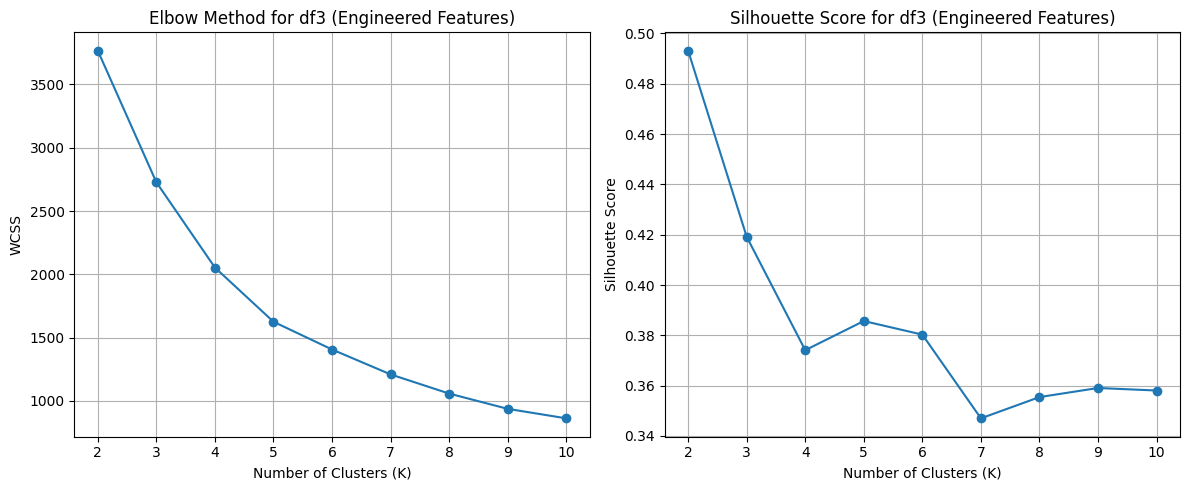


--- Evaluation for df3 (Engineered Features) ---
Chosen Optimal K: 3
Inertia (WCSS): 2727.20
Silhouette Score: 0.42

DataFrame df3 head with engineered clusters:
      ID  Age  Customer_Tenure   Income  Recency  Total_Spending  \
0  5524   68              663  58138.0       58            1617   
1  2174   71              113  46344.0       38              27   
2  4141   60              312  71613.0       26             776   
3  6182   41              139  26646.0       26              53   
4  5324   44              161  58293.0       94             422   

   Total_Purchases Marital_Status_Simplified  Cluster_Engineered  
0               25                    Single                   1  
1                6                    Single                   2  
2               21         In a Relationship                   1  
3                8         In a Relationship                   0  
4               19         In a Relationship                   2  


In [24]:

from sklearn.decomposition import PCA
#Developing a model for df3 with engineered features

# 2. Select features for clustering from df3

engineered_numerical_cols = [
    'Age', 'Customer_Tenure', 'Income', 'Recency',
    'Total_Spending', 'Total_Purchases','Total_Children'
    
]
engineered_categorical_cols = [
    'Marital_Status_Simplified' # Using the simplified columns
]

# Combine selected features into a temporary DataFrame for processing
df3_clustering_features = df3[engineered_numerical_cols + engineered_categorical_cols].copy()

# 3. One-Hot Encode categorical features
df3_encoded = pd.get_dummies(df3_clustering_features, columns=engineered_categorical_cols, drop_first=True)

# 4. Scale features
scaler_df3 = StandardScaler()
scaled_df3_features = scaler_df3.fit_transform(df3_encoded)
scaled_df3 = pd.DataFrame(scaled_df3_features, columns=df3_encoded.columns, index=df3_encoded.index)



pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_df3)



print("\n--- K-Means on df3 (Engineered Features) ---")
print("Shape of scaled_df3:", scaled_df3.shape)
print("Columns used for clustering:\n", scaled_df3.columns.tolist())

# 5. Determine Optimal K for df3 (Elbow Method & Silhouette Score)
wcss_df3 = []
silhouette_scores_df3 = []

# Test K from 2 to 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(reduced)
    wcss_df3.append(kmeans.inertia_)
    score = silhouette_score(reduced, kmeans.labels_)
    silhouette_scores_df3.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss_df3, marker='o')
plt.title('Elbow Method for df3 (Engineered Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_df3, marker='o')
plt.title('Silhouette Score for df3 (Engineered Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Apply K-Means with chosen K

optimal_k_df3 = 3
kmeans_df3 = KMeans(n_clusters=optimal_k_df3, init='k-means++', random_state=42, n_init=10)
cluster_labels_df3 = kmeans_df3.fit_predict(reduced)

# Add cluster labels to df3
df3['Cluster_Engineered'] = cluster_labels_df3

# 7. Evaluate Cluster Quality for df3
inertia_df3 = kmeans_df3.inertia_
silhouette_df3 = silhouette_score(reduced, cluster_labels_df3)

print(f"\n--- Evaluation for df3 (Engineered Features) ---")
print(f"Chosen Optimal K: {optimal_k_df3}")
print(f"Inertia (WCSS): {inertia_df3:.2f}")
print(f"Silhouette Score: {silhouette_df3:.2f}")

# Display first few rows with new cluster labels
print("\nDataFrame df3 head with engineered clusters:\n", df3[[
    'ID', 'Age', 'Customer_Tenure', 'Income', 'Recency',
    'Total_Spending', 'Total_Purchases', 'Marital_Status_Simplified',
    'Cluster_Engineered'
]].head())


In [25]:
df3['Cluster_Engineered'].max()

2

In [26]:


def plot_2d_clusters(df, x_col, y_col, cluster_col='Cluster_Engineered', title=None):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=cluster_col, palette='Set2', s=60)
    plt.title(title or f'{x_col} vs {y_col} by Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


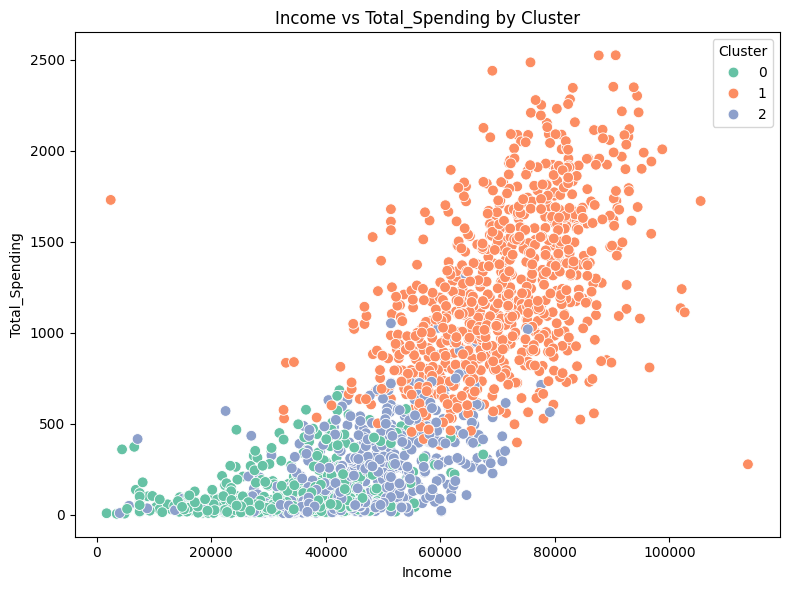

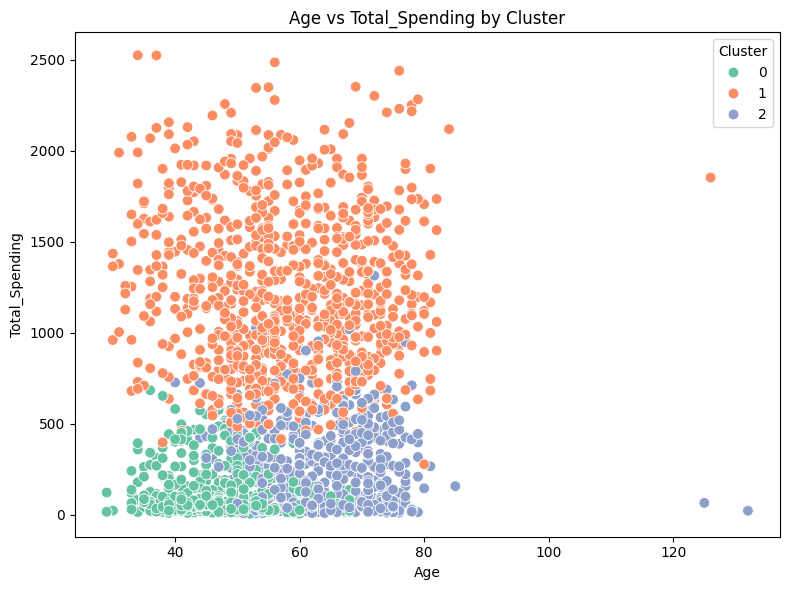

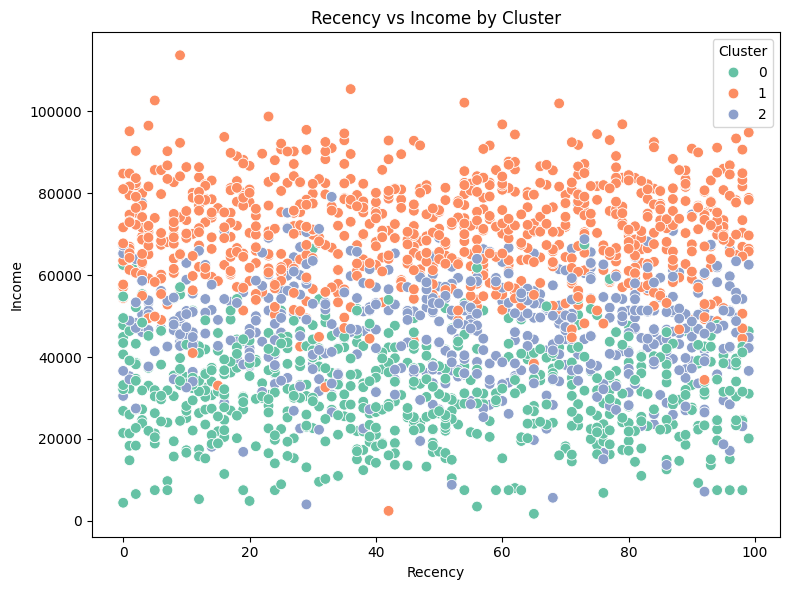

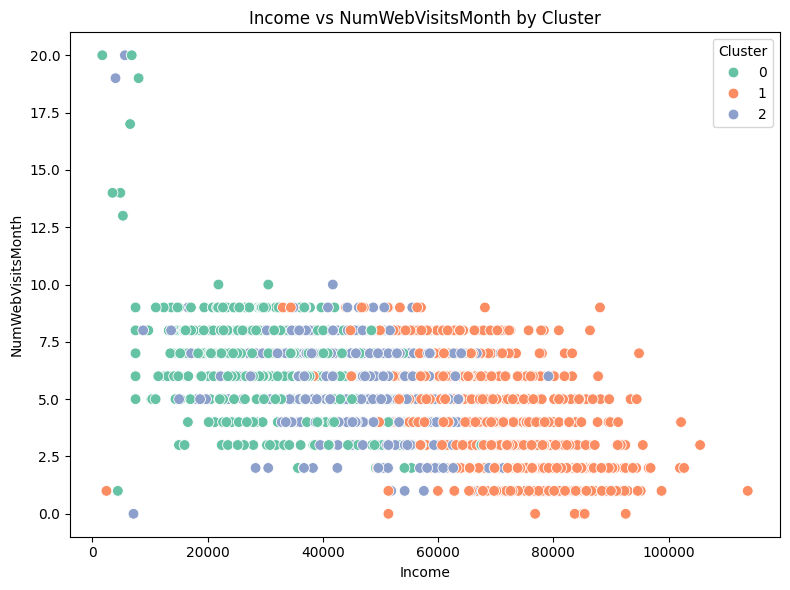

In [27]:
plot_2d_clusters(df3, 'Income', 'Total_Spending')
plot_2d_clusters(df3, 'Age', 'Total_Spending')
plot_2d_clusters(df3, 'Recency', 'Income')
plot_2d_clusters(df3, 'Income', 'NumWebVisitsMonth')


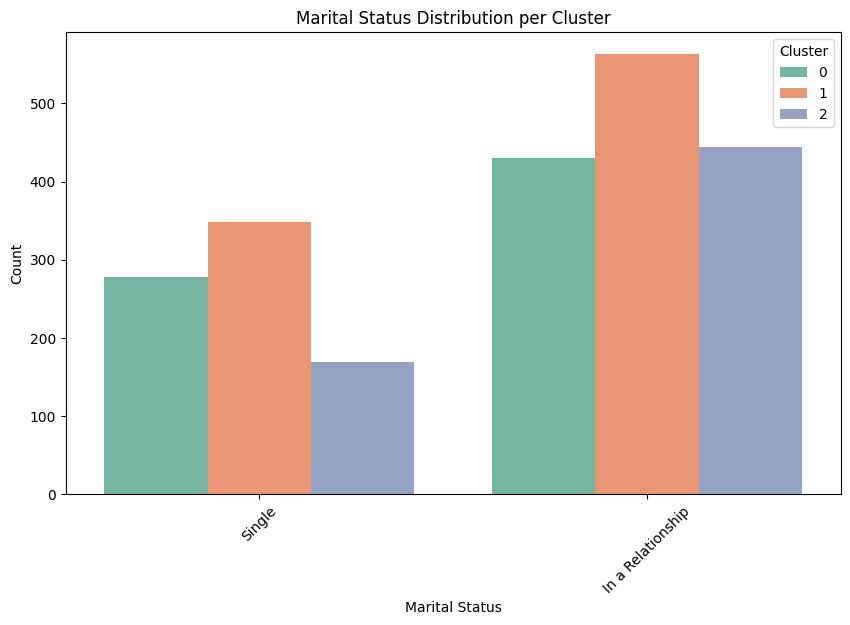

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Marital_Status_Simplified', hue='Cluster_Engineered', palette='Set2')
plt.title('Marital Status Distribution per Cluster')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

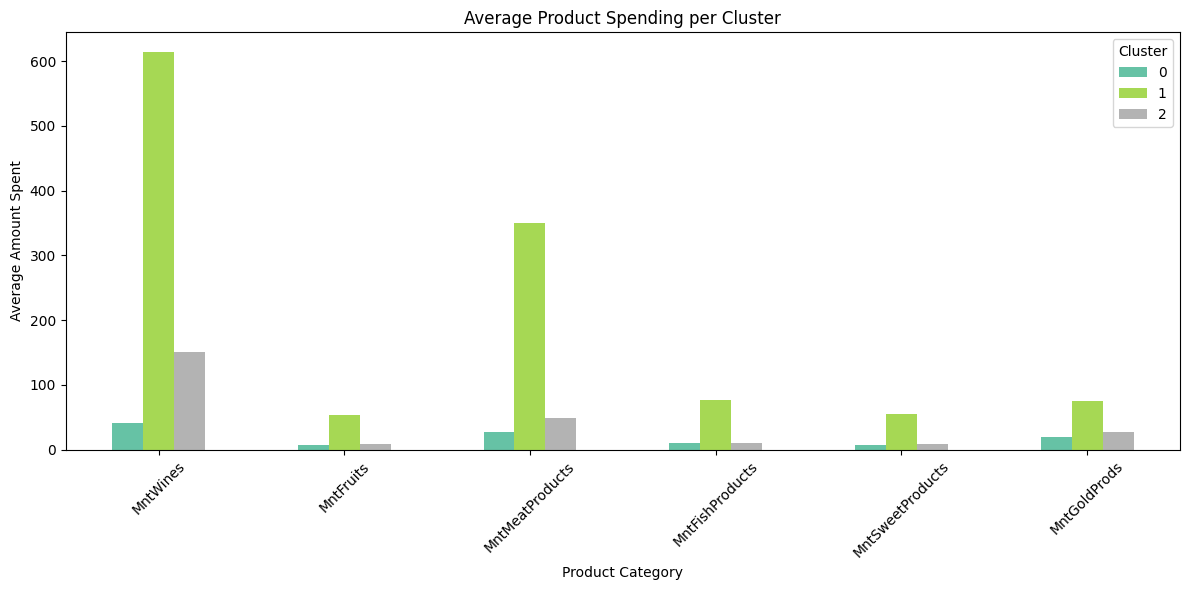

In [29]:
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculate average product spending per cluster
cluster_product_means = df3.groupby('Cluster_Engineered')[product_cols].mean().T

# Plot
plt.figure(figsize=(12, 6))
cluster_product_means.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average Product Spending per Cluster')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


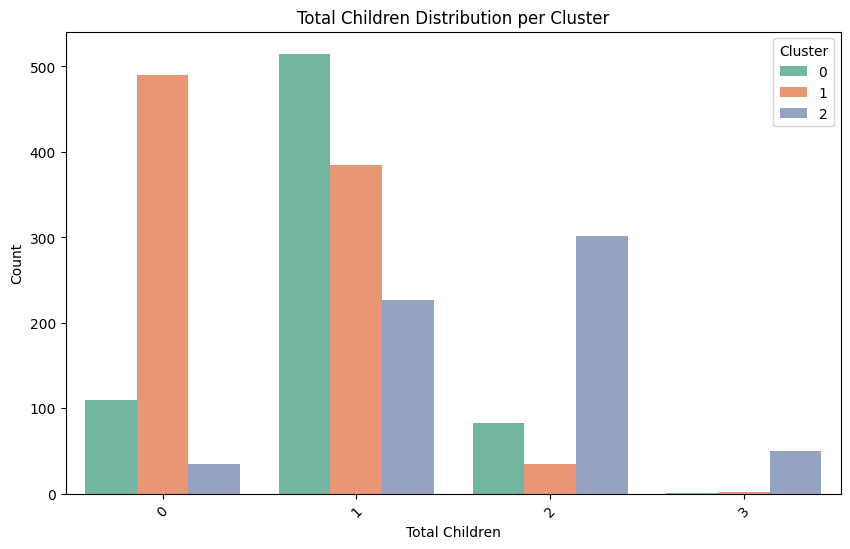

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Total_Children', hue='Cluster_Engineered', palette='Set2')
plt.title('Total Children Distribution per Cluster')
plt.xlabel('Total Children')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


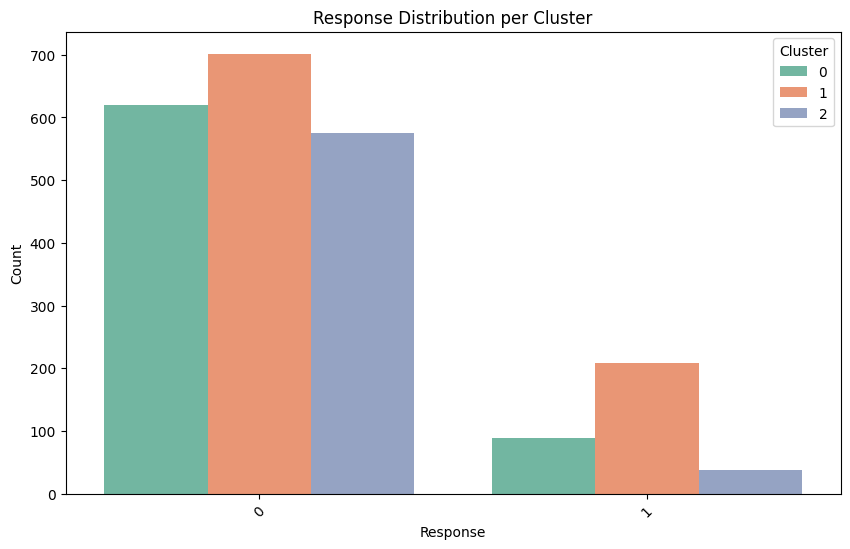

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Response', hue='Cluster_Engineered', palette='Set2')
plt.title('Response Distribution per Cluster')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

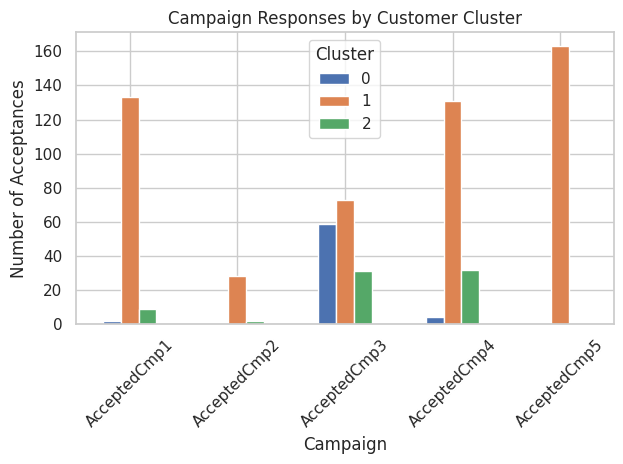

In [32]:


# List of campaign response columns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Group by Cluster and sum campaign responses
cluster_campaigns = df3.groupby('Cluster_Engineered')[campaigns].sum().reset_index()

# Set plotting style
sns.set(style='whitegrid')

# Plot each campaign response across clusters
plt.figure(figsize=(12, 6))
cluster_campaigns.set_index('Cluster_Engineered').T.plot(kind='bar')
plt.title('Campaign Responses by Customer Cluster')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

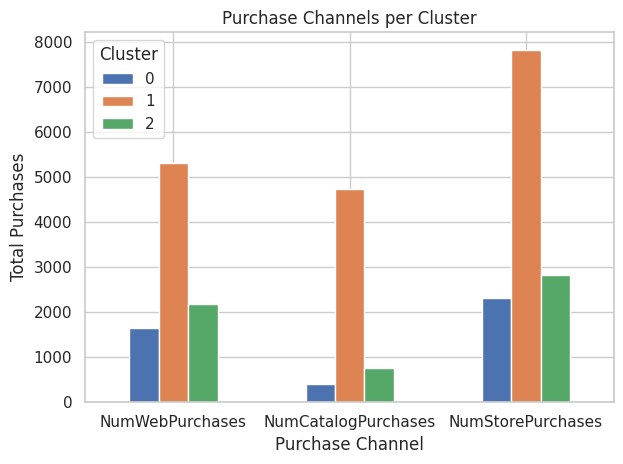

In [33]:


# Example channel columns (adjust if yours are different)
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Group by cluster and sum purchase channels
channel_data = df3.groupby('Cluster_Engineered')[channels].sum().reset_index()

# Plot as a grouped bar chart
plt.figure(figsize=(10, 6))
channel_data.set_index('Cluster_Engineered').T.plot(kind='bar', rot=0)
plt.title('Purchase Channels per Cluster')
plt.xlabel('Purchase Channel')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


/tmp/ipykernel_4050/3772317597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Education', palette='viridis', order=df2['Education'].value_counts().index)


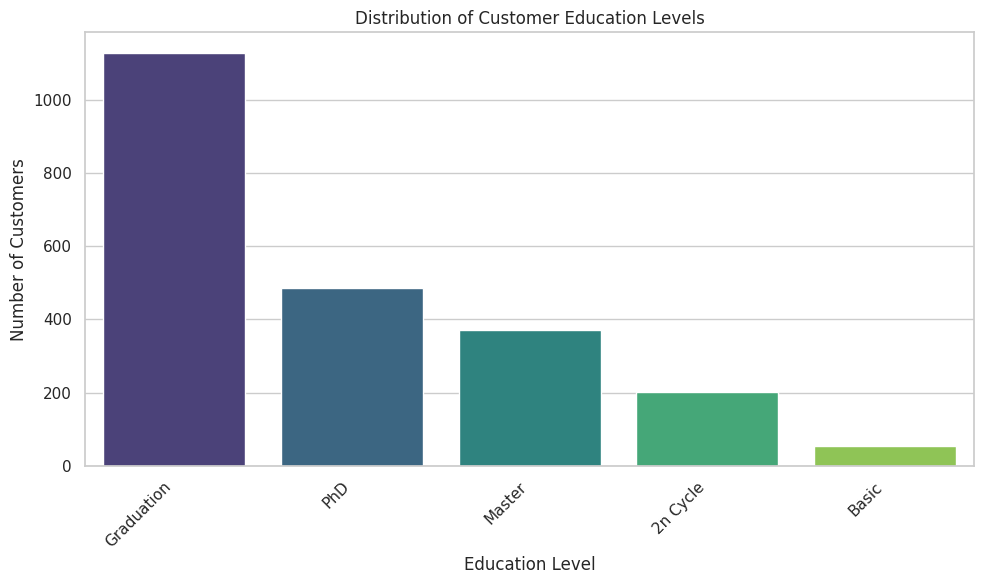

/tmp/ipykernel_4050/3772317597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='Marital_Status_Simplified', palette='magma', order=df3['Marital_Status_Simplified'].value_counts().index)


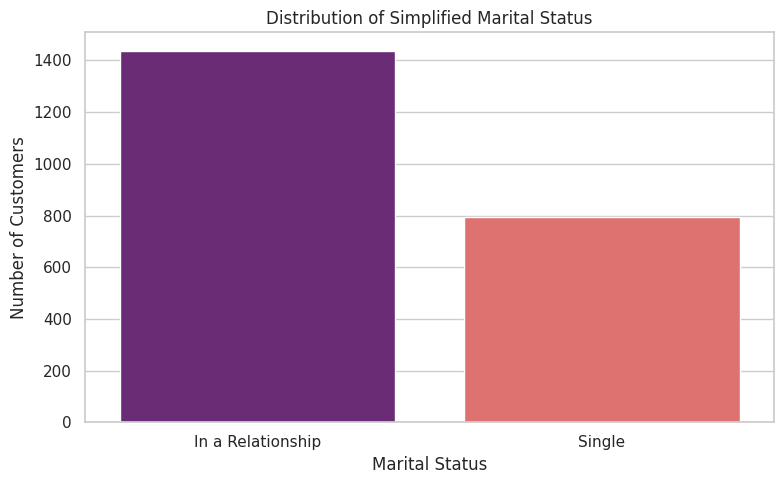

/tmp/ipykernel_4050/3772317597.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Kidhome', palette='cividis', order=df2['Kidhome'].value_counts().index)


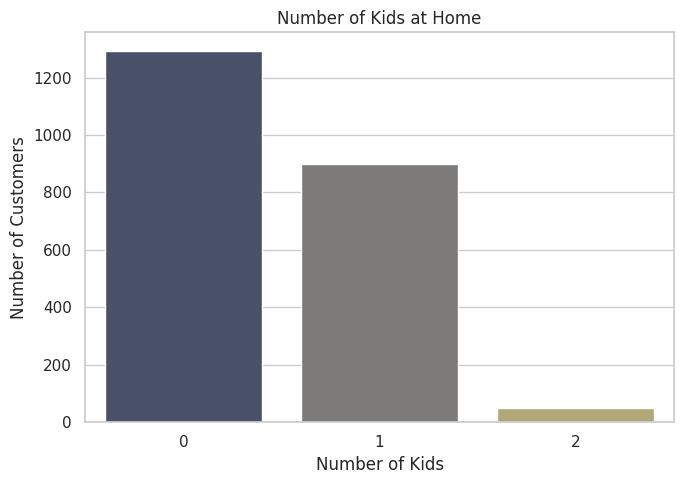

/tmp/ipykernel_4050/3772317597.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Teenhome', palette='plasma', order=df2['Teenhome'].value_counts().index)


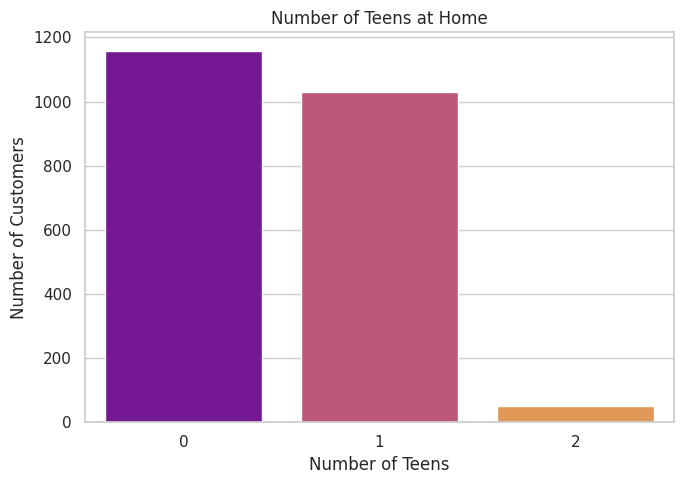

/tmp/ipykernel_4050/3772317597.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Response', palette='rocket', order=df2['Response'].value_counts().index)


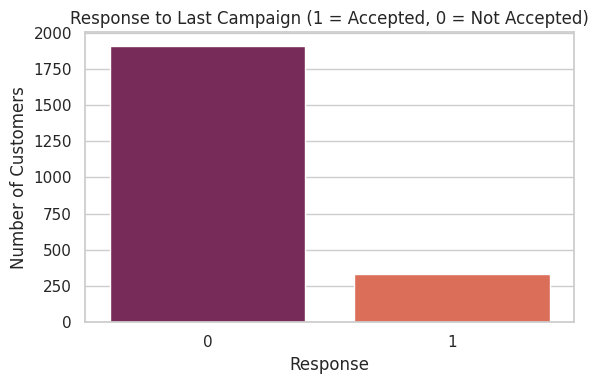

/tmp/ipykernel_4050/3772317597.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Complain', palette='crest', order=df2['Complain'].value_counts().index)


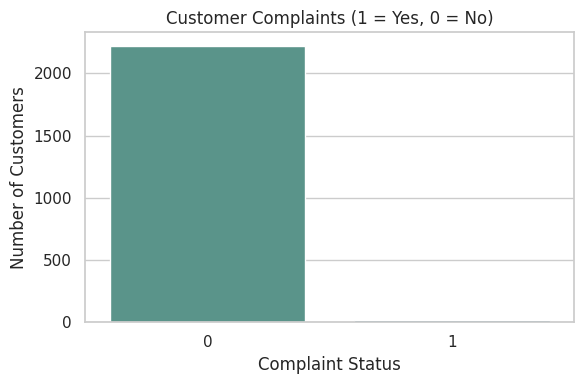

In [34]:
# Count plot for Education
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Education', palette='viridis', order=df2['Education'].value_counts().index)
plt.title('Distribution of Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count plot for Marital Status Simplified(Engineered_features)
plt.figure(figsize=(8, 5))
sns.countplot(data=df3, x='Marital_Status_Simplified', palette='magma', order=df3['Marital_Status_Simplified'].value_counts().index)
plt.title('Distribution of Simplified Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Plot 4: Count Plot for Kidhome (Number of Kids at Home)
plt.figure(figsize=(7, 5))
sns.countplot(data=df2, x='Kidhome', palette='cividis', order=df2['Kidhome'].value_counts().index)
plt.title('Number of Kids at Home')
plt.xlabel('Number of Kids')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('kidhome_count_plot.png')
plt.show()

# Plot 5: Count Plot for Teenhome (Number of Teens at Home)
plt.figure(figsize=(7, 5))
sns.countplot(data=df2, x='Teenhome', palette='plasma', order=df2['Teenhome'].value_counts().index)
plt.title('Number of Teens at Home')
plt.xlabel('Number of Teens')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('teenhome_count_plot.png')
plt.show()

# Plot 6: Count Plot for Response to Last Campaign
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='Response', palette='rocket', order=df2['Response'].value_counts().index)
plt.title('Response to Last Campaign (1 = Accepted, 0 = Not Accepted)')
plt.xlabel('Response')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('response_campaign_count_plot.png')
plt.show()

# Plot 7: Count Plot for Complain
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='Complain', palette='crest', order=df2['Complain'].value_counts().index)
plt.title('Customer Complaints (1 = Yes, 0 = No)')
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('complain_count_plot.png')
plt.show()



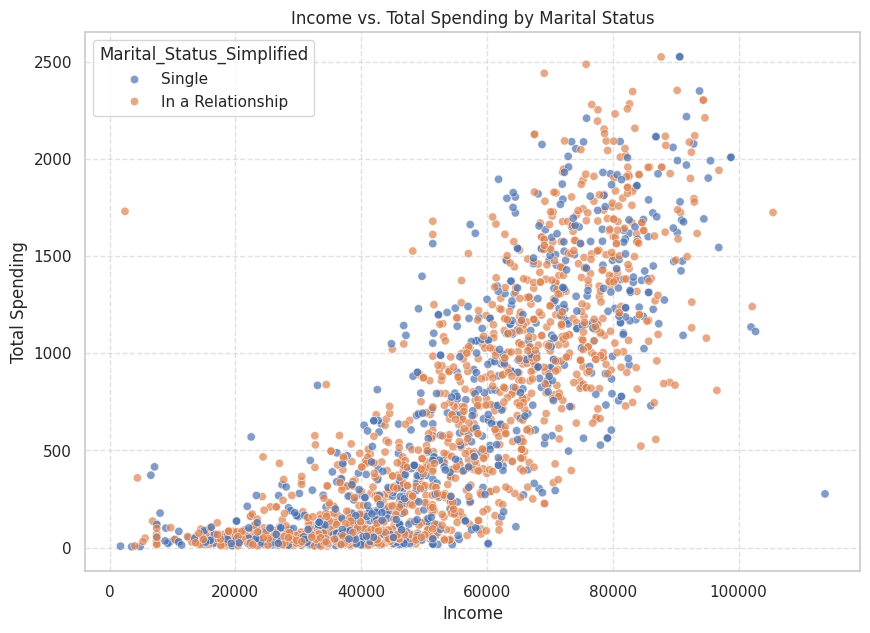

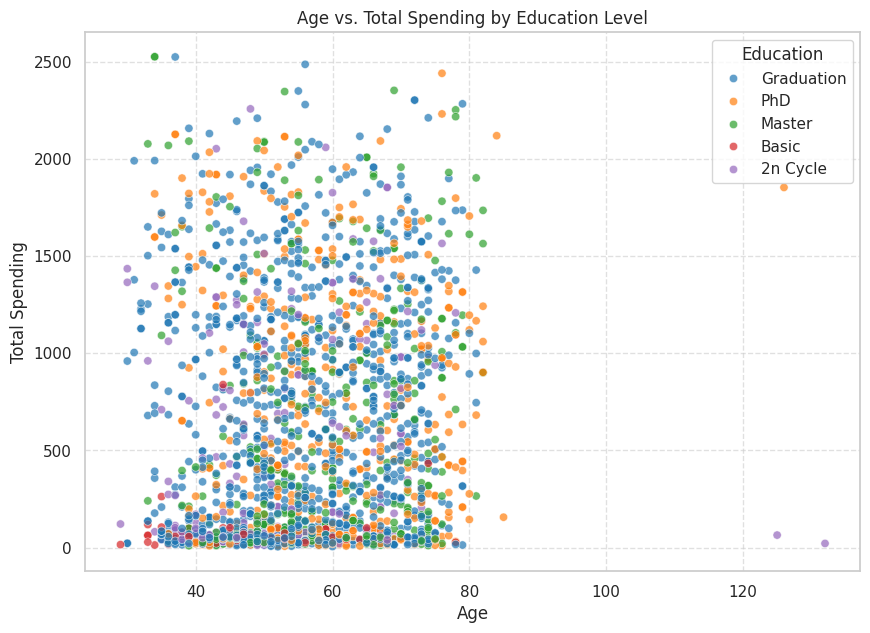

In [35]:
# Scatter plot: Income vs. Total Spending
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df3, x='Income', y='Total_Spending', hue='Marital_Status_Simplified', palette='deep', alpha=0.7)
plt.title('Income vs. Total Spending by Marital Status')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot: Age vs. Total Spending
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df3, x='Age', y='Total_Spending', hue='Education', palette='tab10', alpha=0.7)
plt.title('Age vs. Total Spending by Education Level')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

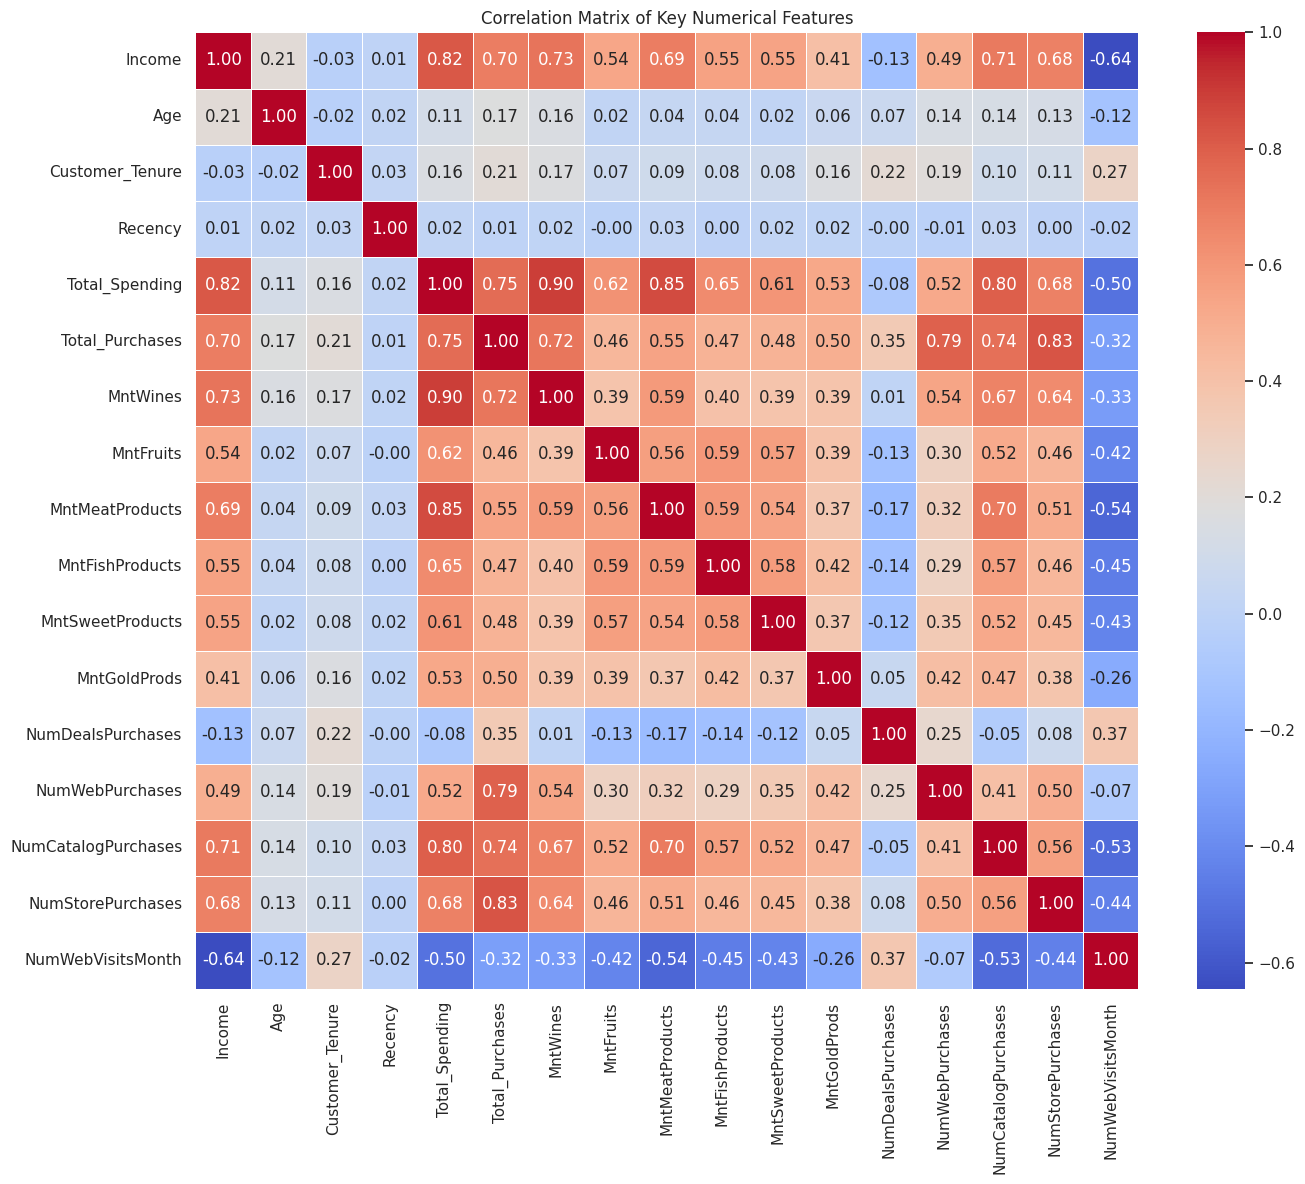

In [36]:
# Select relevant numerical columns for correlation
numerical_cols = [
    'Income', 'Age', 'Customer_Tenure', 'Recency', 'Total_Spending', 'Total_Purchases',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

# Calculate the correlation matrix
correlation_matrix = df3[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
#Predicting model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df3.dtypes
numerical_cols=['Income','Recency','Age','Total_Spending','Total_Purchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
non_numerical=['Marital_Status_Simplified']
df3_encoded=pd.get_dummies(data=df3,columns=['Marital_Status_Simplified'])


In [39]:
marital_encoded=['Marital_Status_Simplified_In a Relationship','Marital_Status_Simplified_Single']

x=df3_encoded[numerical_cols+marital_encoded]
y=df3_encoded['Cluster_Engineered']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

model=RandomForestClassifier(n_estimators=100)


In [40]:

model.fit(x_train,y_train)
y_preds=model.predict(X=x_test)
score=accuracy_score(y_pred=y_preds,y_true=y_test)
#percentage_score=accuracy_score*100
print(f"Model Accuracy:{score*100}%")

Model Accuracy:88.40985442329227%


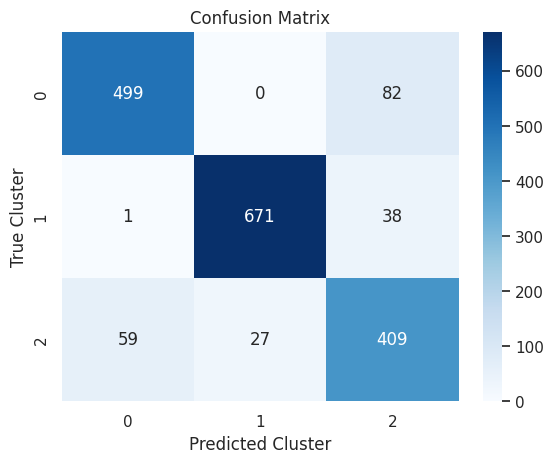

In [ ]:
from sklearn.metrics import confusion_matrix

plt.rcParams['font.family'] = 'sans-serif'



cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.show()
